# Assignment 3

In [1]:
# We are aware the names should be put in the first cell.
# But to make the table with our name,ANR and email we need to import this first.
from ipy_table import *  # External python code, used to make tables. 
# Other python files in the same folder as this file are used to keep this file clean.
from __future__ import division
from numpy import *
from operator import *
import matplotlib.pyplot as plt
from scipy import optimize, arange
from operator import add
%matplotlib inline

In [2]:
Names = [
['Name', 'ANR', 'email'],
['1. Jordy Duits', '489542', 'J.Duits@uvt.nl'],    
['2. Sjoerd Hooijmaaijers', '496687', 'S.H.N.A.Hooijmaaijers@uvt.nl'],
['3. Tim Schrama', '249525', 'T.H.G.Schrama@uvt.nl']];
make_table(Names)
set_row_style(0, color='lightGreen', bold=True, thick_border='bottom')

Name,ANR,email
1. Jordy Duits,489542,J.Duits@uvt.nl
2. Sjoerd Hooijmaaijers,496687,S.H.N.A.Hooijmaaijers@uvt.nl
3. Tim Schrama,249525,T.H.G.Schrama@uvt.nl


# Introduction

During our study in economics we had to solve several competition models, from Bertrand to Stackelberg leadership and from monopoly to perfect competition. Many other economists, especially those specialized in competition, will agree with us that this takes a lot of time. Moreover, it is also very vulnerable for small calculation errors.
Since competition authorities have to work with these kinds of models on a nearly daily basis, we thought it might be helpful to solve these models in a computer program, such that we only have to fill out some parameters and the computer will do the rest. In this report we will try to establish a simple model. We will focus on an upstream and downstream market, since via this way we can model a [Bertrand](https://en.wikipedia.org/wiki/Bertrand_competition) (upstream) combined with a [Cournot](https://en.wikipedia.org/wiki/Cournot_competition) (downstream) competition. 

This will be useful for the competition authority, since if they only have one of the markets, they can set the other one equal to zero.
As an example market we will use the plane industry. The plane industry is characterized by an upstream and downstream market. The upstream market is characterized by duopoly competition (Boeing, Airbus), while the downstream market is characterized by perfect competition.In this assignment, we will examine what the effects will be if the market environment changes on prices and firm profits in both the upstream and downstream markets, as well as on consumer surplus and total welfare.However, as we think that the duopoly structure of the upstream market is in reality characterized by Bertrand competition (price setting), the implication is that there is no actual difference between the Bertrand competition case and the perfect competition case. As a result, we will only consider three scenarios, as shown in table 1.

The main focus of this research is to find the social optimum in an upstream and downstream market.
We will make the distinction between an upstream [monopolist](https://en.wikipedia.org/wiki/Monopoly) facing a downstream monopolist or a [perfect competition](https://en.wikipedia.org/wiki/Perfect_competition). We will also show the market outcomes for an upstream perfect competition facing a downstream perfect competition. We discarded the duopoly in the upstream from the analysis; since in a [Bertrand competition](https://en.wikipedia.org/wiki/Bertrand_competition) the market outcomes are the same as in perfect competition. We will solve these models via python and provide the market outcomes in the general discussion.

### Table of contents
* [Introduction](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Introduction)
* [Assumptions](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Assumptions)
* [Preview of results]()
* [Setting 1](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Setting-1)
* [Setting 2](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Setting-2)
* [Setting 3](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Setting-3)
* [Summarised results](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Summarised-results)
* [Conclusion](http://localhost:8888/notebooks/Dropbox/Ass3/Assignment%203%20Jordy%20Sjoerd%20Tim.ipynb#Conclusion)

Only after uploading to git we found out that we needed to convert our file into .html to make internal links like these possible. Hence, these links are faulty and only result to 404 errors.

### Assumptions
We simplified the demand to $P=1-\sum\limits_{i=1}^n q_i$ where $ i \in \{1,2,\dots,n\} $ Furthermore we assumed zero or low cost.
For the model specifics we assumed homogeneous products and full information. 
Also, we have assumed that there are no externalities.

### preview of results
Preview
Economic theory that in a normal market without externalities perfect competition is always the preferred market structure, as it maximizes social welfare. The other extreme is a monopolistic market structure, where the monopolist maximizes its own profits. As a result, the firm will set a higher price than its marginal costs, and market demand will be lower than under perfect competition. Consequently, there will be a deadweight loss. Consequently, we predict that full competition in both the upstream and downstream markets maximizes social welfare, as it results in the lowest price (= marginal costs downstream firm + the input costs of the downstream firm = marginal costs of downstream firm + the marginal cost of the upstream firm) and thus results in the highest total output. Market structures that fall in between will lead to a social welfare that lies in between of these two extremes.



In [3]:

Idea = [
['Upstream', 'Downstream'],
['Monopolist', 'Monopolist'],    
['Monopolist', 'Perf. competition'],
['Perf. competition', 'Perf. competition']];
make_table(Idea)
set_row_style(0, color='lightGreen', bold=True, thick_border='bottom')
set_cell_style(1, 0, color='yellow')
set_cell_style(1, 1, color='yellow')
set_cell_style(2, 0, color='yellow')
set_cell_style(2, 1, color='Pink')
set_cell_style(3, 0, color='Pink')
set_cell_style(3, 1, color='Pink')




Upstream,Downstream
Monopolist,Monopolist
Monopolist,Perf. competition
Perf. competition,Perf. competition


# Setting 1
## Upstream: Monopoly
## Downstream: Monopoly

In [4]:
#Downstream and upstream monopolist

def demand(q):
    return 1-q



# We define our demand function as 1-q

def profit_upstream(q,W,cU):
    return (W-cU)*q

# The profit of the upstream firm is the wholesale price it charges the downstream firm, 
# minus the production costs - both multiplied by the quantity.
def profit_downstream(q,W,cD):
    return (demand(q)-cD-W)*q

# The profit of the downstream firm is the price it charges its customers, denoted by "demand(q)"
# The production costs, cD, and the wholesaleprice it has to pay to the upstream firm 
# are deducted from the price to the market.
cU = 0 
cD = 0 
# For now, for simplicity we assume that marginal costs of production for both the upstream and downstream are zero.

def q(W,cD):
    q = optimize.fminbound(lambda x, W=W, cD=cD: -profit_downstream(x,W,cD),0,1,full_output=1)
    return q[0]


# First, we optimise the optimal amount that the downstream firm sells to the market

def W(cU):
    W = optimize.fminbound(lambda x, cU=cU: -profit_upstream(q(x,cD),x,cU),0,1,full_output=1)
    return W[0]


# Then we solve for the maximum profit of the downstream firm, 
# in which W - the price at which the upstream firm sells - remains as a variable

print "The optimal wholesale price is", W(0)
print "Hence, the quantity sold is", q(0.5,0)

print "Resulting in a profit for the upstream firm of", profit_upstream(0.25,0.5,0)
print "And a profit for the downstream firm of", profit_downstream(0.25,0.5,0)

def consumersurplus(q):
    consumersurplus = (q*q)/2
    return consumersurplus
print "The consumer surplus at these levels is", consumersurplus(0.25)

def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0.5,0) + profit_downstream(q,0.5,0)
    return total_welfare

print "Summing all together, results in a total welfare of", total_welfare(0.25)

print "-------------"
print "Now we change the costs, to see what will change in such a case"
cD = 0.1
cU = 0.1

print "The optimal wholesale price is", W(0.1)
print "Hence, the quantity sold is", q(0.5,0.1)

print "Resulting in a profit for the upstream firm of", profit_upstream(0.2,0.5,0.1)
print "And a profit for the downstream firm of", profit_downstream(0.2,0.5,0.1)
print "The consumer surplus at these levels is", consumersurplus(0.2)
def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0.5,0.1) + profit_downstream(q,0.5,0.1)
    return total_welfare
print "Summing all together, results in a total welfare of", total_welfare(0.2)

The optimal wholesale price is 0.5
Hence, the quantity sold is 0.25
Resulting in a profit for the upstream firm of 0.125
And a profit for the downstream firm of 0.0625
The consumer surplus at these levels is 0.03125
Summing all together, results in a total welfare of 0.21875
-------------
Now we change the costs, to see what will change in such a case
The optimal wholesale price is 0.5
Hence, the quantity sold is 0.2
Resulting in a profit for the upstream firm of 0.08
And a profit for the downstream firm of 0.04
The consumer surplus at these levels is 0.02
Summing all together, results in a total welfare of 0.14


(-0.5, 1)

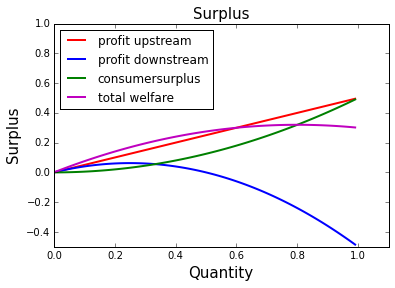

In [5]:
range_q = arange(0.0,1.0,0.01)

# For convenience, we plot what would be the surpluses/profits for each quantity in the situation as described above
# Bear in mind, in this case production costs for both firms are assumed to be zero
plt.clf()
plt.plot(range_q, profit_upstream(range_q,0.5,0), '-', color = 'r', linewidth = 2, label = 'profit upstream')
plt.plot(range_q, profit_downstream(range_q,0.5,0), '-', color = 'b', linewidth = 2, label = 'profit downstream')
plt.plot(range_q, consumersurplus(range_q), '-', color = 'g', linewidth = 2, label = 'consumersurplus')
plt.plot(range_q, total_welfare(range_q), '-', color = 'm', linewidth = 2, label = 'total welfare')
legend = plt.legend(loc= 'upper left' )
plt.title("Surplus",fontsize = 15)
plt.xlabel("Quantity",fontsize = 15)
plt.ylabel("Surplus",fontsize = 15,rotation = 90)
plt.xlim(0.0,1.1)
plt.ylim(-0.5,1)

# Setting 2
## Upstream: Monopolist
## Downstream: Perfect competition

In [6]:
def demand(q):
    return 1-q

# Upstream firm produces the requested q by the upstream.

# We define our demand function as 1-q

def profit_upstream(q,W,cU):
    return (W-cU)*q
# Unaltered compared to the initial case
def profit_downstream(q,W,cD): 
    # Because there is perfect competition in the downstream, 
    # the price the downstream firms charge is equal to its marginal costs.
    # Its marginal costs are its costs from producing, cD, and the price it has to pay the upstream firm W.
    return ((cD+W)-(cD+W))*q

cU = 0 
cD = 0 
# Again, we assume production costs for both upstream and downstream firms to be zero
def q(W,cD):
    return 1-(W+cD)
# Since the downstream market is now perfect competition, they will make zero profit, and will pay a 'price' of 'W+cD'
# Hence, the quantity sold is 1 minus the price. 

def W(cU):
    W = optimize.fminbound(lambda x, cU=cU: -profit_upstream(q(x,cD),x,cU),0,1,full_output=1)
    return W[0]

# Thus we solve for the maximum profit of the downstream firm, 
# in which W - the price at which the upstream firm sells - remains as a variable

print "The optimal wholesale price is", W(0)
print "Hence, the quantity sold is", q(0.5,0)

print "Resulting in a profit for the upstream firm of", profit_upstream(0.5,0.5,0)
print "And a profit for the downstream market of", profit_downstream(0.5,0.5,0)

print "The consumer surplus now is", consumersurplus(0.5)
def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0.5,0) + profit_downstream(q,0.5,0)
    return total_welfare
print "Summing all together, total welfare is", total_welfare(0.5)

print "-------------"
print "Now we change the costs, to see what will change in such a case"
cD = 0.1
cU = 0.1

def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0.5,0.1) + profit_downstream(q,0.5,0.1)
    return total_welfare
print "The optimal wholesale price is", W(0.1)
print "Hence, the quantity sold is", q(0.5,0.1)

print "Resulting in a profit for the upstream firm of", profit_upstream(0.4,0.5,0.1)
print "And a profit for the downstream market of", profit_downstream(0.4,0.5,0.1)
print "The consumer surplus now is", consumersurplus(0.4)
print "Summing all together, total welfare is", total_welfare(0.4)

The optimal wholesale price is 0.5
Hence, the quantity sold is 0.5
Resulting in a profit for the upstream firm of 0.25
And a profit for the downstream market of 0.0
The consumer surplus now is 0.125
Summing all together, total welfare is 0.375
-------------
Now we change the costs, to see what will change in such a case
The optimal wholesale price is 0.5
Hence, the quantity sold is 0.4
Resulting in a profit for the upstream firm of 0.16
And a profit for the downstream market of 0.0
The consumer surplus now is 0.08
Summing all together, total welfare is 0.24


(-0.5, 1)

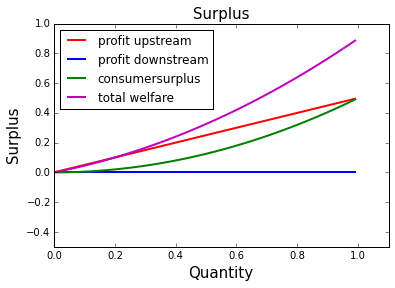

In [7]:
range_q = arange(0.0,1.0,0.01)

# Again, the same graph depicting the new situations.
# This graph assumes that cD and cU are zero
plt.clf()
plt.plot(range_q, profit_upstream(range_q,0.5,0), '-', color = 'r', linewidth = 2, label = 'profit upstream')
plt.plot(range_q, profit_downstream(range_q,0.5,0), '-', color = 'b', linewidth = 2, label = 'profit downstream')
plt.plot(range_q, consumersurplus(range_q), '-', color = 'g', linewidth = 2, label = 'consumersurplus')
plt.plot(range_q, total_welfare(range_q), '-', color = 'm', linewidth = 2, label = 'total welfare')
legend = plt.legend(loc= 'upper left' )
plt.title("Surplus",fontsize = 15)
plt.xlabel("Quantity",fontsize = 15)
plt.ylabel("Surplus",fontsize = 15,rotation = 90)
plt.xlim(0.0,1.1)
plt.ylim(-0.5,1)

# Setting 3
## Upstream Perfect Competition
## Downstream Perfect Competition

In [8]:
#Downstream PC; U=PC

def demand(q):
    return 1-q

# Upstream firm produces the requested q by the upstream.

# We define our demand function as 1-q

def profit_upstream(q,W,cU):
    return (W-cU)*q

def profit_downstream(q,W,cD): 
    # Because there is perfect competition in the downstream, 
    # the price the downstream firms charge is equal to its marginal costs.
    # Its marginal costs are its costs from producing, cD, and the price it has to pay the upstream firm W.
    return ((cD+W)-(cD+W))*q

cU = 0 
cD = 0 

def q(W,cD):
    return 1-(W+cD)

# The optimal price a downstream firm charges is equal to its total costs of W+cD, the quantity is 1 minus this price.
def W(cU):
    W = cU
    return W

# The optimal price for an individual upstream firm is equal to its costs, which are zero.


print "The optimal wholesale price is", W(0)
print "Hence, the quantity sold is", q(0,0)

print "Resulting in a profit for the upstream firm of", profit_upstream(1,0,0)
print "And a profit for the downstream market of", profit_downstream(1,0,0)

print "The consumer surplus now is", consumersurplus(1)
def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0,0) + profit_downstream(q,0,0)
    return total_welfare
print "Summing all together, total welfare is", total_welfare(1)
print "-------------"
print "Now, to see what happens when costs of producing for both up- and downstream firms increases to 0.1"
cD = 0.1
cU = 0.1


print "The optimal wholesale price is", W(0.1)
print "Hence, the quantity sold is", q(0.1,0.1)
def total_welfare(q):
    total_welfare = consumersurplus(q) + profit_upstream(q,0.1,0.1) + profit_downstream(q,0.1,0.1)
    return total_welfare
print "Resulting in a profit for the upstream firm of", profit_upstream(0.8,0.1,0.1)
print "And a profit for the downstream market of", profit_downstream(0.8,0.1,0.1)
print "The consumer surplus now is", consumersurplus(0.8)
print "Summing all together, total welfare is", total_welfare(0.8)

The optimal wholesale price is 0
Hence, the quantity sold is 1
Resulting in a profit for the upstream firm of 0
And a profit for the downstream market of 0
The consumer surplus now is 0.5
Summing all together, total welfare is 0.5
-------------
Now, to see what happens when costs of producing for both up- and downstream firms increases to 0.1
The optimal wholesale price is 0.1
Hence, the quantity sold is 0.8
Resulting in a profit for the upstream firm of 0.0
And a profit for the downstream market of 0.0
The consumer surplus now is 0.32
Summing all together, total welfare is 0.32


(-0.5, 1)

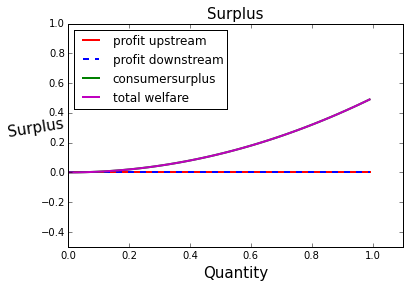

In [9]:
range_q = arange(0.0,1.0,0.01)

# Again, a graph depicting the scenario.
plt.clf()
plt.plot(range_q, profit_upstream(range_q,0,0), '-', color = 'r', linewidth = 2, label = 'profit upstream')
plt.plot(range_q, profit_downstream(range_q,0,0), '--', color = 'b', linewidth = 2, label = 'profit downstream')
plt.plot(range_q, consumersurplus(range_q), '-', color = 'g', linewidth = 2, label = 'consumersurplus')
plt.plot(range_q, total_welfare(range_q), '-', color = 'm', linewidth = 2, label = 'total welfare')
legend = plt.legend(loc= 'upper left' )
plt.title("Surplus",fontsize = 15)
plt.xlabel("Quantity",fontsize = 15)
plt.ylabel("Surplus",fontsize = 15,rotation = 9)
plt.xlim(0.0,1.1)
plt.ylim(-0.5,1)

# Summarised results

In [10]:
print 'table 2'
ResultNoCost = [
['Cu & Cd = 0', 'Mono-Mono', 'Mono-PC', 'PC-PC'],
['Wholesale Price', '0.5', '0.5', '0.0'],    
['Quantity', '0.25', '0.5', '1'], 
['Upstream profit', '0.125', '0.25', '0.0'], 
['Downstream profit', '0.0625', '0.0', '0.0'], 
['Consumer Surplus', '0.03125', '0.125', '0.5'], 
['Total Surplus', '0.21875', '0.325', '0.5']]; 

make_table(ResultNoCost)
apply_theme('basic_both')
set_global_style(color='LightCyan')
set_row_style(0, color='SkyBlue')
set_column_style(0, color='SkyBlue')
set_cell_style(0, 0, color='white')
set_cell_style(2, 3, color='PaleGreen')
set_cell_style(3, 2, color='PaleGreen')
set_cell_style(4, 1, color='PaleGreen')
set_cell_style(5, 3, color='PaleGreen')
set_cell_style(6, 3, color='PaleGreen')



table 2


Cu & Cd = 0,Mono-Mono,Mono-PC,PC-PC
Wholesale Price,0.5,0.5,0.0
Quantity,0.25,0.5,1
Upstream profit,0.125,0.25,0.0
Downstream profit,0.0625,0.0,0.0
Consumer Surplus,0.03125,0.125,0.5
Total Surplus,0.21875,0.325,0.5


In table 2 above we can see the results for when costs are zero.

In table 3 below we see the results for when both upstream and downstream production costs are 0.1


In [11]:
print 'Table 3'
ResultWithCost = [
['Cu & Cd = 0.1', 'Mono-Mono', 'Mono-PC', 'PC-PC'],
['Wholesale Price', '0.5', '0.5', '0.1'],    
['Quantity', '0.2', '0.4', '0.8'], 
['Upstream profit', '0.08', '0.16', '0.0'], 
['Downstream profit', '0.04', '0.0', '0.0'], 
['Consumer Surplus', '0.02', '0.08', '0.32'], 
['Total Surplus', '0.14', '0.24', '0.32']];

make_table(ResultWithCost)
apply_theme('basic_both')
set_global_style(color='LightPink')
set_row_style(0, color='Salmon')
set_column_style(0, color='Salmon')
set_cell_style(0, 0, color='white')
set_cell_style(2, 3, color='HotPink')
set_cell_style(3, 2, color='HotPink')
set_cell_style(4, 1, color='HotPink')
set_cell_style(5, 3, color='HotPink')
set_cell_style(6, 3, color='HotPink')

Table 3


Cu & Cd = 0.1,Mono-Mono,Mono-PC,PC-PC
Wholesale Price,0.5,0.5,0.1
Quantity,0.2,0.4,0.8
Upstream profit,0.08,0.16,0.0
Downstream profit,0.04,0.0,0.0
Consumer Surplus,0.02,0.08,0.32
Total Surplus,0.14,0.24,0.32


# Conclusion

The results clearly show what we expected in advance. The scenario in which there is perfect competition in both the upstream and downstream market maiximezes total welfare.
For the airplane industry example, this means that the situation in which there is bertrand competition also maximizes total welfare.